# Hands-on 1

In [ ]:
import tensorflow as tf
import numpy as np
import os
import time

# Load "Alice in Wonderland" text dataset
path_to_file = tf.keras.utils.get_file('alice.txt', 'https://www.gutenberg.org/files/11/11-0.txt')
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# Preprocess the text
vocab = sorted(set(text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text])

# Prepare training sequences
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

# Create training batches
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Build the RNN model
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

rnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),  # Remove batch_input_shape
    tf.keras.layers.SimpleRNN(rnn_units,
                              return_sequences=True,
                              stateful=True,
                              recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
])

# Compile the model
rnn_model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True))

# Training the model
EPOCHS = 20

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

history = rnn_model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 3.8975
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 2.8754
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.4477
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.2626
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 2.1459
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 2.1276
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 2.0088
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.9411
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.8694
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.8211
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 1.7666
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 1.7141
Epoch 13/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 1.6685
Epoch 14/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.6329
Epoch 15/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.5964
Epoc

In [ ]:
load_weights_path = './training_checkpoints/ckpt_20.weights.h5'
rnn_model.load_weights(load_weights_path)

In [ ]:
history = rnn_model.fit(dataset, epochs=100, callbacks=[checkpoint_callback])

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 2.6903
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.5121
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 1.4102
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 1.3651
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.3264
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 1.2990
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 1.2692
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.2592
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 1.2343
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 1.2127
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 1.1965
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 1.1662
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.1483
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 1.1238
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - lo

In [ ]:
# Generating text using the trained model
def generate_text(model, start_string):
    num_generate = 1000
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []
    temperature = 1.0

    model.layers[1].reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = predictions[0]
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

print(generate_text(rnn_model, start_string="Alice was"))

Alice was not much strail: she had been all the way down one side of the Gryphon, and Alice looked down at them, and began:—

“I didn’t know that you’re mad?”

“Turnd us in the wood, “is to grown at hers, and
half happens. Oh, I’ve had nothing you dear the wat allad their faces“it’s storying every
door, she ran off a head under of little Alice, as she went hurried off.

Alice waited the Queen in a very humble tone, going
down on one knee as he spoke, “we were live alfoed to open her
imaning the King said gravely, “and go on with the nly a large of the players to be
executed followed on, “And what
anxioush, and was no the earth. And
then at last it unfolded
its arms, took the hookah out of its mouth, and
addressing of  beain. I am some small as she could, in the words
do it beat stoop the same as they used to do:—one else to do,
and perhaps after all it might tell her sid chooure of the Dormouse, after thinking a minute or
a paurhe is—” Tastilled out “The race is olly: “‘_Well_


# Hands-on 2

In [ ]:
import tensorflow as tf
import nltk
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, sent_tokenize
import re

# Load and preprocess the "Alice in Wonderland" text
nltk.download('punkt')
path_to_file = tf.keras.utils.get_file('alice.txt', 'https://www.gutenberg.org/files/11/11-0.txt')
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# Clean and tokenize the text
text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove special characters and lowercase
sentences = sent_tokenize(text)  # Sentence tokenization

# Word tokenization
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Display some tokenized sentences
print(tokenized_sentences[:2])

[['start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'alices', 'adventures', 'in', 'wonderland', 'illustration', 'alices', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'i', 'down', 'the', 'rabbithole', 'chapter', 'ii', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', 'a', 'caucusrace', 'and', 'a', 'long', 'tale', 'chapter', 'iv', 'the', 'rabbit', 'sends', 'in', 'a', 'little', 'bill', 'chapter', 'v', 'advice', 'from', 'a', 'caterpillar', 'chapter', 'vi', 'pig', 'and', 'pepper', 'chapter', 'vii', 'a', 'mad', 'teaparty', 'chapter', 'viii', 'the', 'queens', 'croquetground', 'chapter', 'ix', 'the', 'mock', 'turtles', 'story', 'chapter', 'x', 'the', 'lobster', 'quadrille', 'chapter', 'xi', 'who', 'stole', 'the', 'tarts', 'chapter', 'xii', 'alices', 'evidence', 'chapter', 'i', 'down', 'the', 'rabbithole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', '

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Training the Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)

In [ ]:
# Save the model
model.save("word2vec_model.model")

In [ ]:
# Load the model
model = Word2Vec.load("word2vec_model.model")

# Explore word vectors
vector = model.wv['alice']  # Get vector for "alice"
print(vector)

# Find similar words
similar_words = model.wv.most_similar('alice', topn=5)
print(similar_words)

[-0.08305957  0.19331737 -0.0216352  -0.0017145  -0.18095595 -0.15331574
  0.13891393  0.41945025 -0.14068642 -0.16969393 -0.07336712 -0.20480576
  0.01552807  0.08193001 -0.11109331 -0.18407379  0.04732214 -0.06716109
  0.08544179 -0.30279136  0.08236815  0.04519682  0.00829021 -0.04066369
 -0.05815195 -0.06574731 -0.2698667   0.08334814 -0.12998904  0.02927423
  0.22680454  0.05279003  0.08280299 -0.11782591 -0.13599898  0.13164836
  0.15987058 -0.06241811 -0.22405775 -0.25547475 -0.03915517 -0.1935921
 -0.27073842 -0.09614064  0.1790371  -0.12549746 -0.0038324  -0.00860391
  0.10549444  0.16464338  0.05138221  0.0348611  -0.09787409 -0.04919628
 -0.1068759  -0.12842666  0.07596288 -0.16156858 -0.08839816  0.08244867
 -0.09327728 -0.12229448  0.04349808  0.00221022 -0.1554247   0.23986173
  0.2453995   0.09741098 -0.44217283  0.28819603 -0.14310256  0.31393647
  0.19937618 -0.16574237  0.09703708 -0.00894739  0.19363932  0.02722147
 -0.1746794   0.0519316  -0.26599073 -0.05061958 -0.

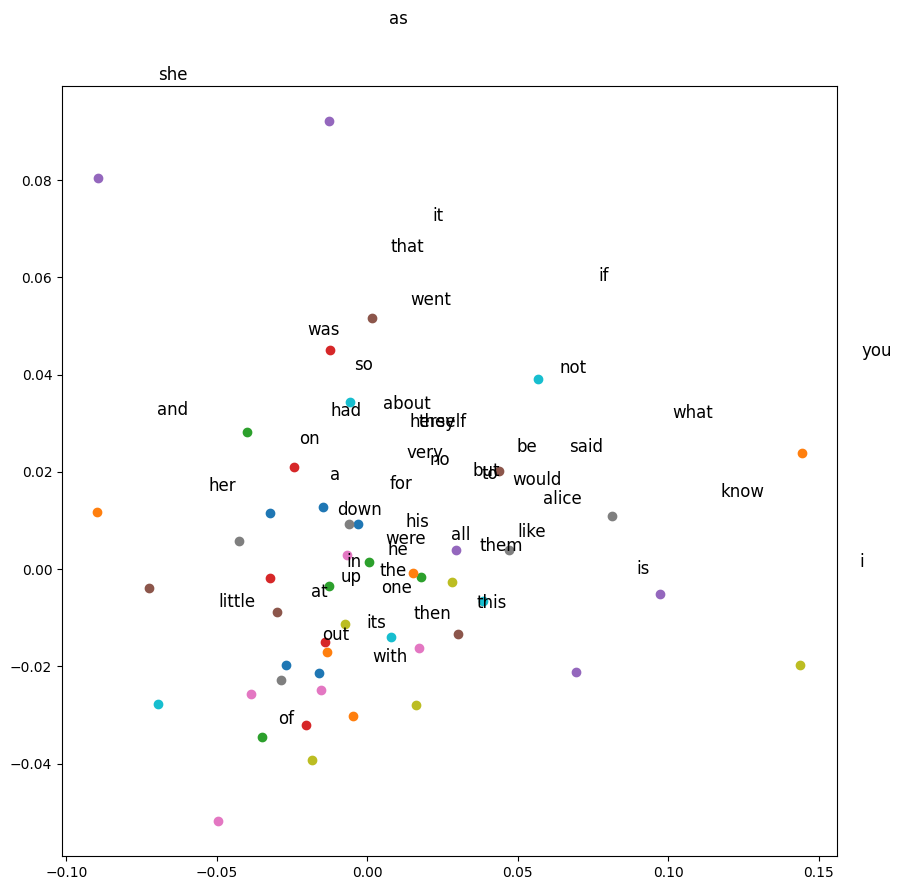

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality of word vectors
pca = PCA(n_components=2)
words = list(model.wv.index_to_key)[:50]  # Take the first 50 words
word_vectors = [model.wv[word] for word in words]
reduced_vectors = pca.fit_transform(word_vectors)

# Plotting
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)
plt.show()